Nesse arquivo foi usada a seguinte estratégia:

Utilizei um recurso chamado [DTW](dtw.r-forge.r-project.org) (Dynamic Time Warping) onde se calcula a dissimilaridades entre as séries temporais.
Nesse caso entre cada movimento ou path realizado pelo usuário. 
Dessa forma podemos contabilizar o quão similar as series são entre si.

Com essa estratégia podemos calcular uma **`distancia`** e assim realizar procedimentos como *clusterizações* e até *classificações*. Nesse caso utilizei um simples **KNN**(k-nearest neighbors) para realizar a classificação binária.

Importante dizer que esse método (**DTW**) é robusto para séries com múltiplas variaveis (multivariate).

Obs. Podemos melhorar essa abordagem adicionando um filtro **Kernel** na contrução de um modelo **KNN** mais robusto.

In [20]:
library(dtw)
library(KODAMA)
library(caret)
library(pROC)

groups <- read.csv(file="./MovementAAL/groups/MovementAAL_DatasetGroup.csv",head=TRUE,sep=",")
targetAll <- read.csv(file="./MovementAAL/dataset/MovementAAL_target.csv",head=TRUE,sep=",")


In [21]:

#Group 1
allDataGroup1<-list()
allDataGroup1Target<-list()
groups1 = groups[groups$dataset_ID==1, ]

index<-1
for (id in groups1$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup1[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup1Target[index]<-targetAll[[2]][id]
    index<-index+1
}

kdist <- dist(allDataGroup1, method="DTW",diag = TRUE,upper = TRUE)
kdistM<- as.matrix(kdist)

In [22]:
target <- unlist(allDataGroup1Target)
allDataGroup1TargetFrame = as.data.frame(target)
train <- createDataPartition(allDataGroup1TargetFrame$target, p = .7, list = TRUE,times=10)
y <- allDataGroup1TargetFrame$target


#### Média e Desvio padrão respectivamente.
##### Group 1, com Cross Validation tipo 10-fold

In [23]:
allAccuracyGroup1 <- c()

for( i in 1:length(train)){
    test  <- (1:nrow(allDataGroup1TargetFrame))[-train[[i]]]
    preds <- knn.predict(train[[i]], test,y, kdistM, k=3,agg.meth="majority") 
    matrix <- confusionMatrix(preds, y[test])
    #accuracy
    allAccuracyGroup1 <- c(allAccuracyGroup1,matrix[3]$overall[[1]])
}
mean(allAccuracyGroup1)
sd(allAccuracyGroup1)

[1] 0.9466667

[1] 0.02810913

In [24]:
#Group 2


allDataGroup2<-list()
groups2 = groups[groups$dataset_ID==2, ]
allDataGroup2Target<-list()
index<-1
for (id in groups2$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup2[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup2Target[index]<-targetAll[[2]][id]
    index<-index+1
}


kdist <- dist(allDataGroup2, method="DTW",diag = TRUE,upper = TRUE)
kdistM<- as.matrix(kdist)

In [25]:
target <- unlist(allDataGroup2Target)
allDataGroup2TargetFrame = as.data.frame(target)
train <- createDataPartition(allDataGroup2TargetFrame$target, p = .7, list = TRUE,times=10)
y <- allDataGroup2TargetFrame$target

#### Média e Desvio padrão respectivamente.
##### Group 2, com Cross Validation tipo 10-fold

In [26]:
allAccuracyGroup2 <- c()

for( i in 1:length(train)){
    test  <- (1:nrow(allDataGroup2TargetFrame))[-train[[i]]]
    preds <- knn.predict(train[[i]], test,y, kdistM, k=3,agg.meth="majority") 
    matrix <- confusionMatrix(preds, y[test])
    #accuracy
    allAccuracyGroup2 <- c(allAccuracyGroup2,matrix[3]$overall[[1]])
}

mean(allAccuracyGroup2)
sd(allAccuracyGroup2)

[1] 0.9

[1] 0.06352282

In [27]:
#Group 3


allDataGroup3<-list()
groups3 = groups[groups$dataset_ID==3, ]
allDataGroup3Target<-list()
index<-1
for (id in groups3$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allDataGroup3[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataGroup3Target[index]<-targetAll[[2]][id]
    index<-index+1
}


kdist <- dist(allDataGroup3, method="DTW",diag = TRUE,upper = TRUE)
kdistM<- as.matrix(kdist)

In [28]:
target <- unlist(allDataGroup3Target)
allDataGroup3TargetFrame = as.data.frame(target)
train <- createDataPartition(allDataGroup3TargetFrame$target, p = .7, list = TRUE,times=10)
y <- allDataGroup3TargetFrame$target

#### Média e Desvio padrão respectivamente.
##### Group 3, com Cross Validation tipo 10-fold

In [29]:
allAccuracyGroup3 <- c()

for( i in 1:length(train)){
    test  <- (1:nrow(allDataGroup3TargetFrame))[-train[[i]]]
    preds <- knn.predict(train[[i]], test,y, kdistM, k=3,agg.meth="majority") 
    matrix <- confusionMatrix(preds, y[test])
    #accuracy
    allAccuracyGroup3 <- c(allAccuracyGroup3,matrix[3]$overall[[1]])
}

mean(allAccuracyGroup3)
sd(allAccuracyGroup3)

[1] 0.8935484

[1] 0.04820755

In [30]:
#All DataBases

targetAll <- read.csv(file="./MovementAAL/dataset/MovementAAL_target.csv",head=TRUE,sep=",")
allData<-list()
allDataTarget<-list()
index<-1
for (id in targetAll$X.sequence_ID){
    caminho <-paste("./MovementAAL/dataset/MovementAAL_RSS_",id,".csv",sep="")
    allData[[index]]<-read.csv(file=caminho,head=TRUE,sep=",")
    allDataTarget[index]<-targetAll[[2]][id]
    index<-index+1
}

kdist <- dist(allData, method="DTW",diag = TRUE,upper = TRUE)
kdistM<- as.matrix(kdist)

In [31]:
target <- unlist(allDataTarget)
allDataTargetFrame = as.data.frame(target)
train <- createDataPartition(allDataTargetFrame$target, p = .7, list = TRUE,times=10)
y <- allDataTargetFrame$target

#### Média e Desvio padrão respectivamente.
##### Todos os Groups em uma base apenas, com Cross Validation tipo 10-fold

In [32]:
allAccuracy <- c()

for( i in 1:length(train)){
    test  <- (1:nrow(allDataTargetFrame))[-train[[i]]]
    preds <- knn.predict(train[[i]], test,y, kdistM, k=3,agg.meth="majority") 
    matrix <- confusionMatrix(preds, y[test])
    #accuracy
    allAccuracy <- c(allAccuracyGroup3,matrix[3]$overall[[1]])
}

mean(allAccuracy)
sd(allAccuracy)

[1] 0.8925875

[1] 0.0458446

#### Matrix de confusão
#### Todos os Groups em uma base apenas

In [35]:
#All groups datasets Confusion Matrix 
target <- unlist(allDataTarget)
allDataTargetFrame = as.data.frame(target)
train <- createDataPartition(allDataTargetFrame$target, p = .7, list = TRUE,times=1)
y <- allDataTargetFrame$target
y <- factor(unlist(y),labels=c("No", "Yes"))
test  <- (1:nrow(allDataTargetFrame))[-train[[1]]]
preds <- knn.predict(train[[1]], test,y, kdistM, k=3,agg.meth="majority") 
classes <- factor(unlist( y[test]),labels=c("No", "Yes"))
matrix <- confusionMatrix(preds,classes)
matrix


Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  48   5
       Yes  4  37
                                         
               Accuracy : 0.9043         
                 95% CI : (0.826, 0.9553)
    No Information Rate : 0.5532         
    P-Value [Acc > NIR] : 1.206e-13      
                                         
                  Kappa : 0.8059         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.9231         
            Specificity : 0.8810         
         Pos Pred Value : 0.9057         
         Neg Pred Value : 0.9024         
             Prevalence : 0.5532         
         Detection Rate : 0.5106         
   Detection Prevalence : 0.5638         
      Balanced Accuracy : 0.9020         
                                         
       'Positive' Class : No             
                                         

#### Curva ROC e AUC
#### Todos os Groups em uma base apenas


Call:
roc.default(response = classes, predictor = outcome, levels = c("No",     "Yes"))

Data: outcome in 52 controls (classes No) > 42 cases (classes Yes).
Area under the curve: 0.9423

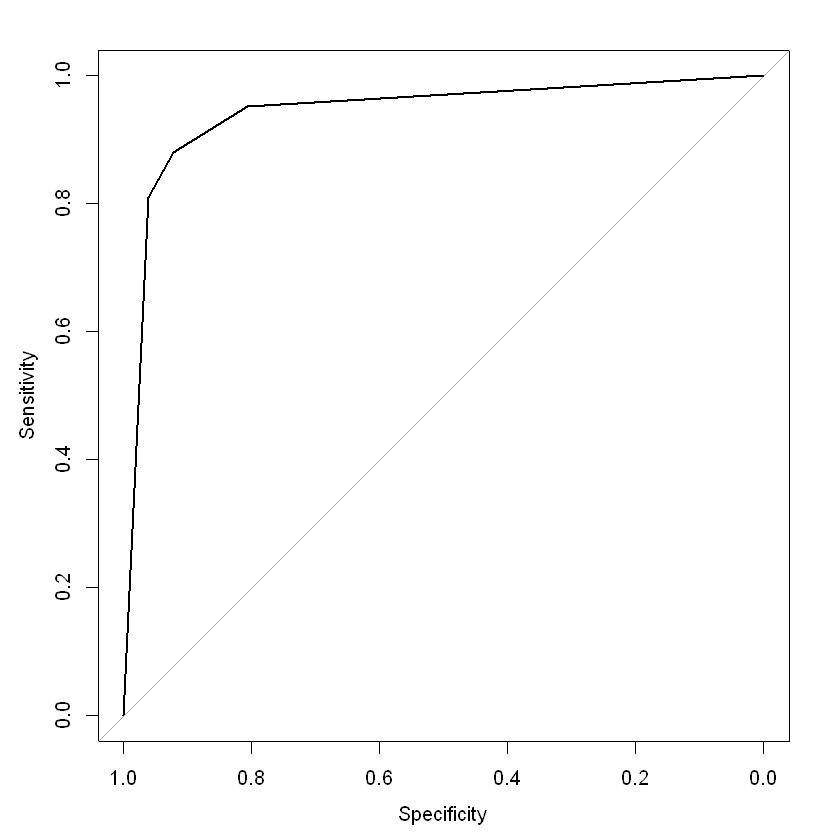

In [36]:
#ROC CURVE AND AUC
predsProb <- t(knn.probability(train[[1]], test,y, kdistM, k=3))
outcome<- predsProb[,1]
rocobj <- roc(classes, outcome,levels=c("No", "Yes"))
plot(rocobj)